# Financial Engineering Systems I - Final Project 2023

Ian Howard, Maren Cordts, Wenhong Cui

University of California, Berkeley

# Table of Contents
**[Part 1: Brownian Motion and Black-Scholes Model](#part1)**
+ [Brownian Motion](#1.1)
+ [Black-Scholes Model](#1.2)

**[Part 2: Pricing Zero-coupon Bond in the CIR Model](#part2)**
+ [CIR Model](#2.1)
+ [Zero-coupon in the CIR Model](#2.2)

**[Part 3: Implied Volatility and Black-Scholes Model](#part3)**
+ [Newton-Raphson Method](#3.2)
+ [Data Collection](#3.3)
+ [Volatility Surface](#3.4)

---
---

In this project, $N$ is the number of time steps, $M$ is the number of paths generated
for the Brownian motion. For example, you could take $N = 100$ and $M = 10,000$.

## Part 1: Brownian Motion and Black-Scholes Model <a name="part1"/>

Import Project Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

### 1.1 Brownian Motion <a name="1.1"/>

#### Question 1.1.1
By using the rescaled random walk, build a program which gives one path of a Brownian motion on $[0,1]$ with a time subdivision $t_{i} = \frac{i}{N}$, $0\leq i\leq N$ and give an example of the value taken by $W_{1}$.

#### Solution 1.1.1

Let $(\Omega,\mathcal{F},\mathbb{P})$ be a probability space with sample space $\Omega$ and filtration $\mathcal{F} = \bigcup_{0\leq t\leq T}\mathcal{F}_{t}$, where $T<+\infty$ is fixed. We assume the state variables are $\mathcal{F}_{t}$-adapted.

$W: [0,T] \times\Omega\rightarrow\mathbb{R}$

A Brownian motion is a stochastic process $\{W_{t}\}_{t\in [0,T]}$ with continuous sample paths (almost surely), where $W_{0} = 0$, and $W$ has independent, Gaussian increments such that $W_{t} \sim N(0,t)$.

In [2]:
# Parameters
M = 1  # no. of simulations
n = 100  # no. of time steps
t = 1  # time

We denote the equation for a scaled random walk by: $W^{n}(t) = \frac{1}{\sqrt{n}}M_{nt}$

In [3]:
# Scaled random walk
rand_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(rand_walk, size=(M,t*n)).T  # determines each move
origin = np.zeros((1,M))  # start
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)  # generates the paths

In [4]:
# Create an array of time steps for the 1 path
ticks = np.linspace(0, t, t*n+1)
print(np.size(ticks), np.size(srw_paths))

101 101


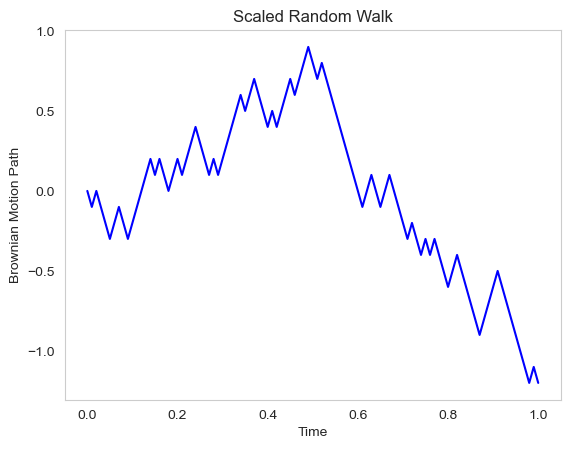

In [5]:
# Plot the paths
plt.rcParams.update({'axes.grid': False})

plt.plot(ticks, srw_paths, color='b')
plt.xlabel('Time')
plt.ylabel('Brownian Motion Path')
plt.title('Scaled Random Walk')
plt.show()

In [6]:
# Print the value of W_{1}
print(f'The value taken by W_{{1}} is {str(*srw_paths[-1])}.')

The value taken by W_{1} is -1.2.


---
**Let's create some simple functions to make our path generation process more efficient as we progress.**

In [7]:
# Define BM paths function
def bm_paths(M=1000, n=100, t=1, seed=0):
    """
    Function that generates BM paths sampled from a Gaussian distribution ~N(0, np.sqrt(dt)).

    :param M: no. of simulations
    :param n: no. of increments
    :param t: time
    :return:  BM paths -> np.ndarray of shape (n+1, M)
    """
    dt = t/n  # time step

    # Simulations of BM
    np.random.seed(seed)  # Set random seed for reproducibility
    steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
    origin = np.zeros((1, M))
    paths = np.concatenate([origin, steps]).cumsum(axis=0)  # M paths of a BM
    return paths


# Function to generate time step ticks for plotting
def x_ticks(M, n, t):
    """
    Function to generate the time-step ticks for plotting. No initial values force manual input.

    :param M: no. of simulations
    :param n: no. of increments
    :param t: time
    :return:  uniform tick spacing pursuant to inputs -> np.ndarray of shape (n+1, M)
    """
    time = np.linspace(0, t, n+1)
    ticks = np.full(shape=(M, n+1), fill_value= time)
    ticks = ticks.T
    return ticks

---

#### Question 1.1.2
Generate $M$ paths of a Brownian motion and prove numerically that $\mathbb{E}[W_{t}] = 0$ and $Var(W_{t}) = t$ for different values of $t$.

#### Solution 1.1.2

In [8]:
# Generate paths w/ new parameters
bm_Q12 = bm_paths(M=10000, n=100, seed=56127)

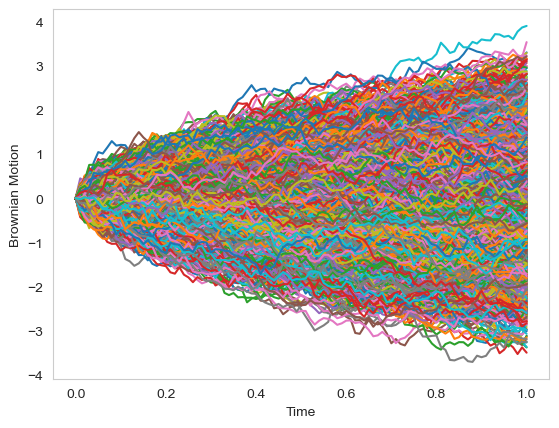

In [9]:
# Plot the paths
plt.plot(x_ticks(10000, 100, 1), bm_Q12)
plt.xlabel('Time')
plt.ylabel('Brownian Motion')
plt.show()

Expectation: $\mathbb{E}[W_{t}]$

In [10]:
# Expectation function to calculate mean at each time step
expectation = lambda x: np.mean(x, axis=0)
exp_bm_Q12 = [expectation(path) for path in bm_Q12[:]]

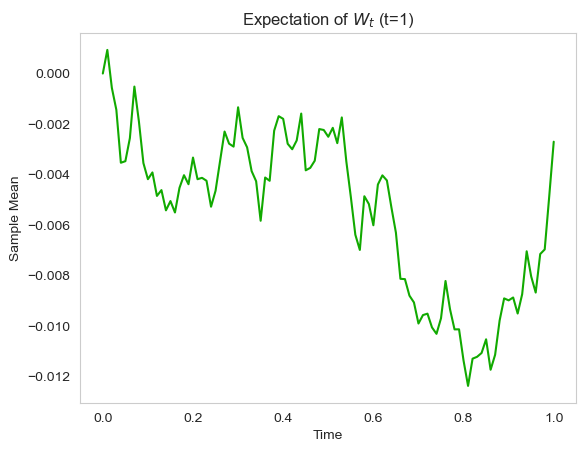

In [11]:
# Plot the sample expectations over time
plt.plot(ticks, exp_bm_Q12, color="#11aa00")
plt.xlabel('Time')
plt.ylabel('Sample Mean')
plt.title(f'Expectation of $W_{{t}}$ (t={t})')
plt.show()

In [12]:
# Print the final sample mean
print(f'The final sample mean is {round(exp_bm_Q12[-1], 3)}.')

The final sample mean is -0.003.


Variance: $Var(W_{t})$

In [13]:
# Variance function
variance = lambda x: np.var(x, axis=0)
var_bm_Q12 = [variance(path) for path in bm_Q12[:]]

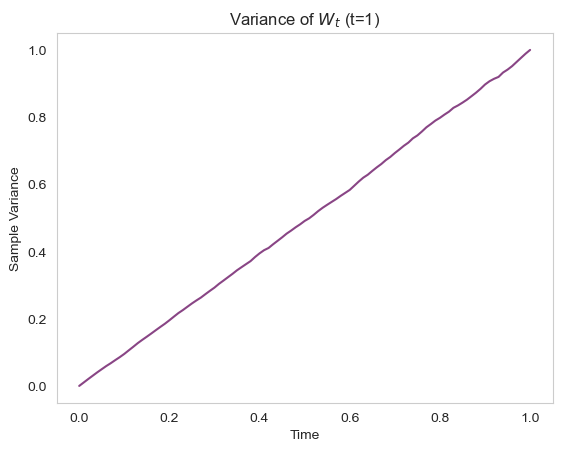

In [14]:
# Plot the sample variance over time
plt.plot(ticks, var_bm_Q12, color='#894585')
plt.xlabel('Time')
plt.ylabel('Sample Variance')
plt.title(f'Variance of $W_{{t}}$ (t={t})')
plt.show()

In [15]:
# Print the final sample variance
print(f'The final sample variance is {round(var_bm_Q12[-1], 3)}.')

The final sample variance is 1.002.


**1.1.2 Interpretation**
Observe that for each timestep, the expectations of the Brownian motion are close to $0$. This result can be computed analytically as we have shown with the result of a final sample mean $\mathbb{E}[W_{t}] = -0.003 \approx 0$. For the variance, we see a that sample variance increases linearly with time and we prove this analytically at $t=1$, $\text{Var}(W_{t}) = 1$.

#### Question 1.1.3
Generate $M$ paths of a Brownian motion and prove numerically that $Cov(W_{t}, W_{s}) = \inf(t,s)$ for some value of $s,t$.

#### Solution 1.1.3

In [16]:
# Define covariance matrix function
def cov_matrix(paths, dims: int) -> pd.DataFrame:
    """
    Generate covariance matrix from an input array of BM paths.
    :param paths: array of BM paths
    :param dims: number of time steps in the paths array
    :return: covariance matrix between W_{t} and W_{s} -> pd.Dataframe of shape (n, n)
    """
    mtx = np.zeros((dims, dims))
    for i in range(len(paths)):
        for j in range(i, len(paths)):
            mtx[i][j] = round(np.cov(paths[i][:], paths[j][:])[0][0], 3)
            mtx[j][i] = mtx[i][j]

    # Convert to dataframe
    matrix = pd.DataFrame(mtx).drop(index=0, columns=0)
    return matrix

In [17]:
# Generate paths w/ new parameters
bm_Q13 = bm_paths(n=10, seed=194035)

# Compute the covariance matrix for bm_Q13
cov_bm_Q13 = cov_matrix(bm_Q13, bm_Q13.shape[0])

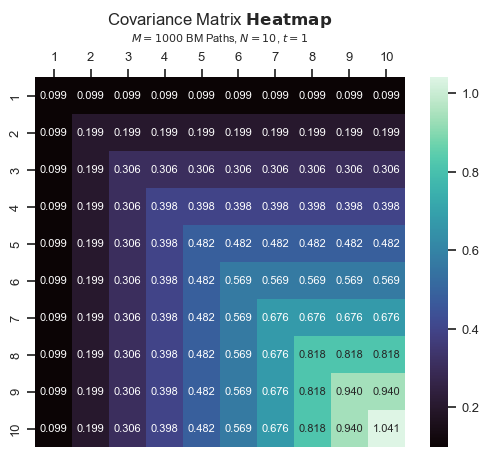

In [18]:
# Plot the covariance heatmap
with sns.axes_style('ticks'):
    sns.set_context("notebook", font_scale=.85)
    hm = sns.heatmap(cov_bm_Q13, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size': 8}, cmap='mako')
    plt.gca().set_title(r'Covariance Matrix $\bf{Heatmap}}$', fontsize=12, loc='center', y=1.12)
    hm.text(.5, 1.125, f'$M={bm_Q13.shape[1]}$ BM Paths, $N={bm_Q13.shape[0]-1}$, $t=1$', ha='center',
            va='top', transform=hm.transAxes, fontsize= 8)
    hm.set(xlabel="", ylabel="")
    hm.xaxis.tick_top()

By cutting away half of the matrix along the main diagonal leaving only the lower triangle, no information gets lost and the map might be easier to read.

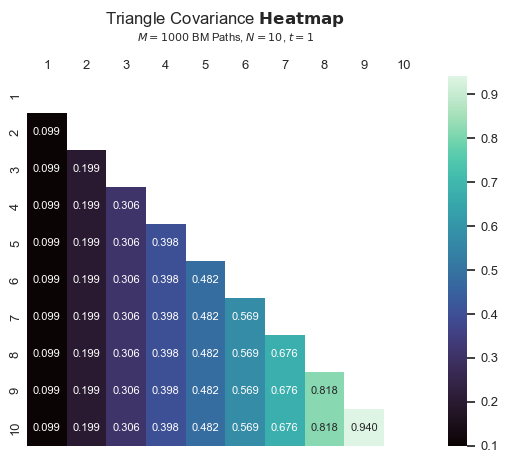

In [19]:
# Create a mask to isolate the upper triangle
mask = np.triu(np.ones_like(cov_bm_Q13, dtype=bool))

# Plot the lower triangle heatmap
with sns.axes_style('white'):
    sns.set_context("notebook", font_scale=.85)
    hm = sns.heatmap(cov_bm_Q13, mask=mask, fmt='.3f', annot=True, annot_kws={'size': 8}, cmap='mako')
    plt.gca().set_title(r'Triangle Covariance $\bf{Heatmap}$', fontsize=12, loc='center', y=1.12)
    hm.text(.5, 1.125, f'$M={bm_Q13.shape[1]}$ BM Paths, $N={bm_Q13.shape[0]-1}$, $t=1$', ha='center',
            va='top', transform=hm.transAxes, fontsize= 8)
    hm.set(xlabel="", ylabel="")
    hm.xaxis.tick_top()
    hm.tick_params(length=0)

**Interpretation 1.1.3**
Observe that for each $s, t$ where $s \neq t$ in the matrix, covariance takes the infimum—or, greatest lower bound—of each subset.

#### Question 1.1.4
Compute numerically $[W, W ]_{t}$ and observe that $[W, W ]_{t} = t$ for $t = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9$ and $t = 1$.

#### Solution 1.1.4

In [20]:
# Generate 1,000,000 paths w/ time steps of 0.1
bm_Q14 = bm_paths(M=1000000, n=10, seed=411658)

In [21]:
# Quadratic variation function
quad_var = lambda x: round(np.square(x[:-1] - x[1:]).sum(), 3)

In [22]:
# Compute & display the quadratic variation [W,W]_{t} for each of the
# timesteps t = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1)
stepsize = np.linspace(0.1, 1, 10)
print(r'The quadratic variations, [W,W]_{t}, for each timestep are:')
for t in stepsize:
    i = int(t/0.1)
    w_w = [quad_var(path[:(i+1)]) for path in bm_Q14.T]
    print(f'[W,W]_{round(t, 1)} = {round(np.mean(w_w), 5)}')

The quadratic variations, [W,W]_{t}, for each timestep are:
[W,W]_0.1 = 0.0999
[W,W]_0.2 = 0.19991
[W,W]_0.3 = 0.30005
[W,W]_0.4 = 0.40003
[W,W]_0.5 = 0.50001
[W,W]_0.6 = 0.50001
[W,W]_0.7 = 0.69991
[W,W]_0.8 = 0.79994
[W,W]_0.9 = 0.89966
[W,W]_1.0 = 0.99955


**Interpretation 1.1.4**
Here, taking $t = 0.1,0.2,\ldots,1$ demonstrates the quadratic variation approximately equals $t$.

### 1.2 Black-Scholes Model <a name="1.2"/>

The Black-Scholes price is the solution to the following SDE under the risk-neutral probability measure:
$$ dS_{t} = rS_{t}dt + \sigma S_{t}dW_{t},\ S_{0}>0,\ r\geq 0,\ \sigma >0 $$
We denote the solution by $S$.

#### 1.2.1 Solution to SDE

#### Question 1.2.1.1
By using the discretisation of the time $t_{i} = \frac{i}{N}$ with $0 \leq i\leq N$, we introduce the following Euler-Maruyama numerical scheme:
\begin{align*}
    \tilde{S}_{0} &= S_{0}  \\
    \tilde{S}_{t_{i+1}}−\tilde{S}_{t_{i}} &= \tilde{S}_{t_{i}}r(t_{i+1}−t_{i})+\tilde{S}_{t_{i}}\sigma (W_{t_{i+1}}−W_{t_{i}})
\end{align*}

Compare $\tilde{S}_{t}$ and $S_{0}e^{\sigma W_{t}+(r-\sigma^{2}/2)t}$ for some values of $t\in [0,1]$.

From now on, we choose the explicit solution to define the solution of the SDE:
$$
S_{t} = S_{0}e^{\sigma W_{t}+(r-\sigma^{2}/2)t}
$$

#### Solution 1.2.1.1

In [23]:
def euler_maruyama(
        T: float = 1.0,
        S0: float = 100,
        r: float = 0.02,  # risk-free interest rate
        sigma: float = 0.3,  # volatility
        n: int = 100,
        seed: int = 0,
) -> plt.plot:
    # Time steps
    dt = T/n
    t = np.linspace(0, T, n)
    # t = np.arange(dt, 1 + dt, dt)  # Start at dt because St=S0 at t=0

    # Brownian motion
    np.random.seed(seed)
    dW = np.sqrt(dt) * np.random.normal(size=n)
    W = np.cumsum(dW)

    # Exact solution
    St = S0*np.exp((r - 0.5*sigma**2)*t + sigma*W)

    # Euler-Maruyama method
    S_tilde = np.zeros(n)
    S_tilde[0] = S0
    for i in range(n - 1):
        S_tilde[i + 1] = S_tilde[i] + S_tilde[i]*r*dt + S_tilde[i]*sigma*dW[i]

    # Plot the results
    plt.rc('lines', linewidth=1.5)
    plt.figure(figsize = (8, 5)); plt.grid(visible=None)
    plt.plot(t, St, label="Exact ($S_t$)", color='r')
    plt.plot(t, S_tilde, label=r"Euler-Maruyama ($\tilde{S}_t$)", color='#2196f3', ls='dotted')
    plt.title('Euler-Maruyama Approximation vs. Explicit Simulation')
    plt.xlabel(r'Time (s)'); plt.ylabel('Stock Price (\$)'); plt.legend(loc=2);

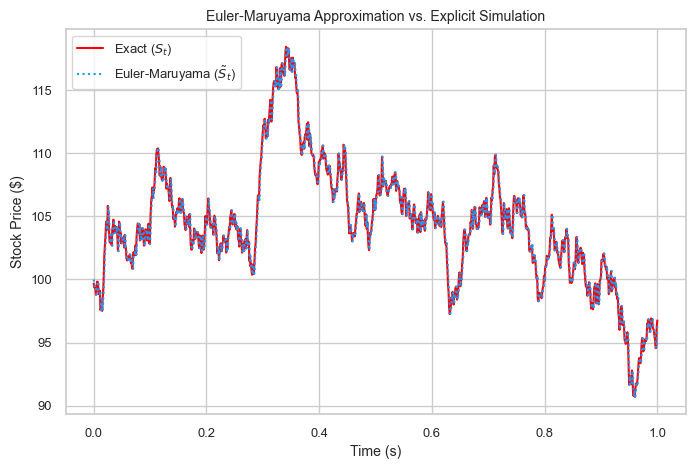

In [24]:
euler_maruyama(r=0.03335, sigma=0.2, n=1000, seed=543)

**Interpretation 1.2.1.1**
The plot comparison provides a visual indication that the Euler-Maruyama method is a good approximation to the exact solution.

#### Question 1.2.1.2
Compute numerically $\mathbb{E}[S_1]$ by approaching the expectation with the Monte Carlo method, that is $\mathbb{E}[S_1] \approx \frac{1}{M} \sum_{j=1}^{M} S_{1}^{(j)}$ where $S_{1}^{(j)}$ is the $j$-th simulation generated by your algorithm of $S_{t}$.

#### Solution 1.2.1.2

In [25]:
# Define a function for realising GBM paths
def gbm_paths(
        S0=100,
        r=0.1,
        sigma=0.3,
        M=1000,
        n=100,
        t=1,
        seed=0
) -> np.ndarray:
    """
    Function that generates GBM paths simulating a stock price.

    :param S0:    stock price at t=0
    :param r:     drift
    :param sigma: volatility
    :param M:     no. of simulations
    :param n:     no. of steps
    :param t:     time
    :return:      GBM paths -> np.ndarray of shape (n+1, M)
    """
    dt = t/n  # time steps

    # Simulations of stock price
    np.random.seed(seed)  # Set random seed for reproducibility
    St = np.exp((r - sigma ** 2 /2)*dt + sigma*np.random.normal(0, np.sqrt(dt), size=(M, n)).T)
    St = np.vstack([np.ones(M), St])  # array of ones

    # Product of S0 with the cumulative product of elements along each path
    St = S0 * St.cumprod(axis=0)
    return St

We simulate $1,000$ geometric Brownian motions for $S_{0}=100,\ r=0.1,\ \sigma=0.3$.

In [26]:
# Generate the GBM paths
gbm_Q21 = gbm_paths(seed=3512)

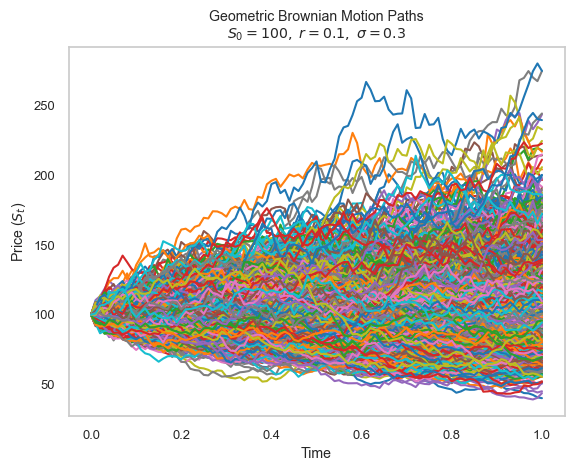

In [27]:
# Plot the simulated stock prices over time
plt.plot(x_ticks(1000, 100, 1), gbm_Q21)
plt.xlabel('Time')
plt.ylabel('Price ($S_{t}$)')
plt.title(
    'Geometric Brownian Motion Paths\n'
    '$S_{0}=100,\ r=0.1,\ \sigma=0.3$')
plt.show()

In [28]:
def monte_carlo(
        T: float = 1,
        S0: float = 100,
        r: float = 0.02,  # risk-free interest rate
        sigma: float = 0.3,  # volatility
        n: int = 100,
        num_simulations: int = 1000,  # number of simulations
        seed: int = 0,
) -> float:
    dt = T / n
    np.random.seed(seed)
    simulations = np.zeros(num_simulations)
    for i in range(num_simulations):
        dW = np.sqrt(dt) * np.random.normal(size=n)
        W = np.cumsum(dW)
        S = S0 * np.exp((r - 0.5 * sigma ** 2) * t + sigma * W)
        simulations[i] = S[-1]  # the final value of the simulation
    return np.mean(simulations)

In [29]:
expected_value = monte_carlo(
    r=0.03335, sigma=0.2, n=100, num_simulations=10000, seed=543
)
print(f"The expected value of S_{{1}}: {expected_value:.2f}")

The expected value of S_{1}: 103.44


#### 1.2.2 Black-Scholes Price of European Options

#### Question 1.2.2.1
Create a function $\texttt{CallBS}$ with input $T, S_0, K, r, \sigma$ which returns the Black-Scholes price of a European call option at time $t=0$ with maturity $T$, underlying asset $S$, strike $K$, interest rate $r$, and volatility $\sigma$. *Hint: we recall that $\texttt{CallBS} ( T, S_0, K, r, \sigma ) = S_0 \mathcal{N}( d_+ ) - K e^{-rT} \mathcal{N}( d_- )$ with $d_+ ( r, S_0, K, T, \sigma ) = \frac{ln( S_0 / K ) + ( r + \sigma^2 / 2 ) T}{\sigma \sqrt{T}},\ d_- ( r, S_0, K, T, \sigma ) = \frac{ln( S_0 / K ) - ( r + \sigma^2 / 2 ) T}{\sigma \sqrt{T}}$ and $\mathcal{N}(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{u^2}{2}} du$.*

#### Solution 1.2.2.1

In [30]:
# Define a function to calculate a call option under Black-Scholes
def blackScholes(T, S0, K, r, sigma):
    "Calculate BS price of call"
    d1 = (np.log(S0/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    price = S0*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
    return price

#### Question 1.2.2.2
Verify numerically the call price at time $t=0$ is increasing with respect to the volatility.

#### Solution 1.2.2.2

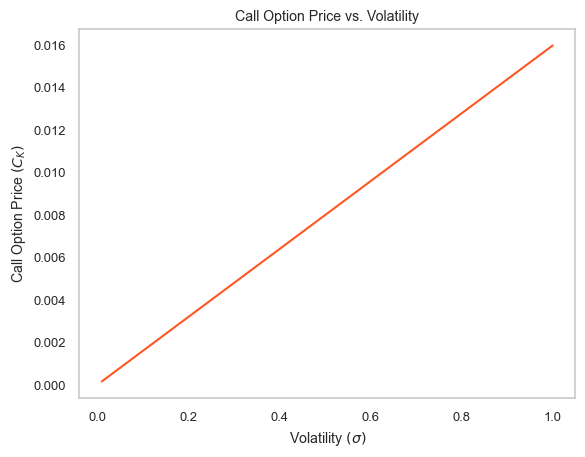

In [31]:
# Set a range for different volatilities
vol_range = np.linspace(0.01, 1, 100)

# Compute BS call prices for the range of sigmas
call_prices = [blackScholes(T=1e-6, S0=40, K=40, r=0.02, sigma=vol) for vol in vol_range]

plt.plot(vol_range, call_prices, color='#ff5722')
plt.xlabel('Volatility $(\sigma)$')
plt.ylabel('Call Option Price $(C_K)$')
plt.title('Call Option Price vs. Volatility')
plt.show()

**Interpretation 1.2.2.2**
As we expect, the plot shows that call option price increases with volatility.

#### Question 1.2.2.3
Now, fix the initial price $S_0 = 40, r = 2\%, \sigma = 0.3$, and $T=1$. Observe that the price at time $t=0$ of a call option is convex with respect to the strike.

#### Solution 1.2.2.3

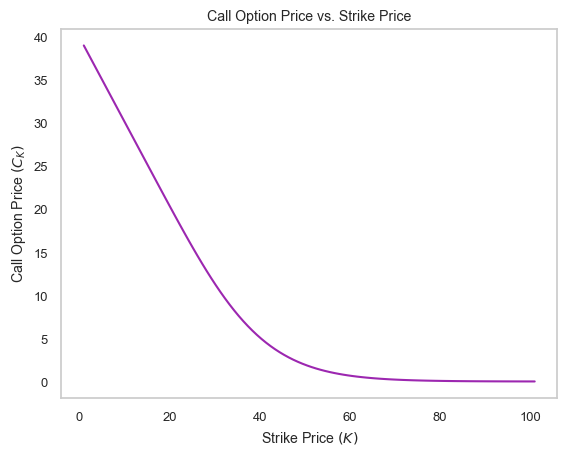

In [32]:
# Define a range for strike prices between 1 & 100
strike_range = np.linspace(1, 101, 100)
price_call = []

# Compute the BS call prices for each strike
for strike in strike_range:
    price = blackScholes(T=1, S0=40, K=strike, r=0.02, sigma=0.3)
    price_call.append(price)

# Plot the results
plt.plot(strike_range, price_call, color='#9c27b0')
plt.xlabel('Strike Price $(K)$')
plt.ylabel('Call Option Price $(C_K)$')
plt.title('Call Option Price vs. Strike Price')
plt.show()

---
---

## Part 2: Pricing Zero-coupon Bond in the CIR Model <a name="part2"/>

This part is inspired by
+ Cox, J.C., J.E. Ingersoll and S.A. Ross (1985). A Theory of the Term Structure of Interest Rates. Econometrica. 53 (2): 385–407.
  - In particular, pages 391 to 394 with $\lambda = 0$.

### 2.1 CIR Model <a name="2.1"/>

We consider a market with interest rate $R$ satisfying the following SDE under the risk neutral measure:
$$ dR_t = \kappa ( \theta - R_t ) dt + \sigma \sqrt{R_t} dW_t,\ r_0 > 0 $$.

Range of values: $\sigma$ between $0.1$ and $0.45$. $\kappa,\ \theta$ can be chosen as you wish (a good range should be $[0.1, 1.5]$. $r_0$ can be ficed at $0.2$, but feel free to choose your own parameters.

Note that starting at $r_0 > 0$, the term $\sigma \sqrt{R_t}$ avoids to get negative $R$ since if there is one time $t_0$ such that $R_{t_0} = 0$, the term $\kappa \theta$ drives the interest to positive values while the noise $\sigma \sqrt{R_{t_0}} = 0$ plays no role.

By using the discretisation of the time, $t_i = \frac{i}{N} T$ with $0 \leq i \leq N$, we introduce the following Euler-Maruyama numerical scheme to approach the solution of this SDE on $[0, T]$:
\begin{align*}
    R_0 &= r_0 \\
    R_{t_{i + 1}} &= R_{t_i} + \kappa ( \theta - R_{t_{i+1}} ) ( t_{i + 1} - t_i ) + \sigma \sqrt{R_{t_i}} ( W_{t_{i + 1}} - W_{t_i} )
\end{align*}

#### Question 2.1.1
When $T$ and $N$ are large enough, check that there exist some time $t_0$ where $R_{t_0} = 0$ if $2\kappa \theta < \sigma^2$.

From now on, we consider only values $\kappa, \theta, \sigma$ satisfying
$$ 2\kappa \theta \geq \sigma^2 $$

Under this condition, the upward drift is sufficiently large to make the origin inaccessible. It is known as Feller's condition.

#### Solution 2.1.1

In [33]:
#2.1.1
# When T and N are large enough
# Parameters
# Set 2κθ<σ^2
r0 = 0.2
k = 0.1
theta = 0.1
sigma = 0.3
M = 1  # no. of simulations
N = 1000000  # no. of time steps
T = 10000

In [34]:
def simulate_process_big_T_and_N(M, N, T, r0, k, theta, sigma, seed):
    np.random.seed(seed)
    dt = T/N
    dW = np.sqrt(dt) * np.random.randn(N, M)
    a = np.zeros((N+1, M))
    a[0, :] = r0
    for i in range(1, N+1):
        a[i, :] = a[i-1, :] + k*(theta-a[i-1, :])*dt + sigma*np.sqrt(a[i-1, :])*dW[i-1, :]
    return a[:, :]

r_Q211 = simulate_process_big_T_and_N(M, N, T, r0, k, theta, sigma, seed=56128)
r_Q211

array([[0.2       ],
       [0.20472475],
       [0.18863884],
       ...,
       [       nan],
       [       nan],
       [       nan]])

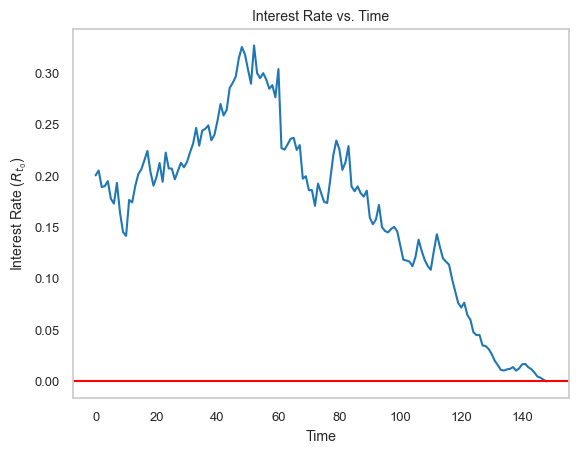

In [35]:
# Plot the array to check whether it reaches 0
plt.plot(r_Q211)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='-')

# Show plot
plt.xlabel('Time')
plt.ylabel(r'Interest Rate ($R_{t_{0}}$)')
plt.title('Interest Rate vs. Time')
plt.show()

**Interpretation 2.1.1**
We observe in the plot above that interest reaches $0$ as time goes on.

#### Question 2.1.2
Let $T = 1$. Check numerically that
$$ \mathbb{E}[R_t] = r_0 e^{-\kappa t} + \theta ( 1 - e^{-\kappa t} ) $$
for some values of $t \in [0, 1]$.

#### Solution 2.1.2

In [36]:
# 2.1.2
# Parameters
r0 = 0.2
k = 1
theta = 1
sigma = 0.3
M = 500  # no. of simulations
N = 10  # no. of time steps

In [37]:
def simulate_process(M, N, r0, k, theta, sigma, seed):
    np.random.seed(seed)
    dt = 1/N
    dW = np.sqrt(dt) * np.random.randn(N, M)
    a = np.zeros((N+1, M))
    a[0, :] = r0
    for i in range(1, N+1):
        a[i, :] = a[i-1, :] + k*(theta-a[i-1, :])*dt + sigma*np.sqrt(a[i-1, :])*dW[i-1, :]
    return a[:, :]

r_Q212 = simulate_process(M, N, r0, k, theta, sigma, seed=56128)
r_Q212

array([[0.2       , 0.2       , 0.2       , ..., 0.2       , 0.2       ,
        0.2       ],
       [0.29525719, 0.23004961, 0.28326042, ..., 0.26239681, 0.28924993,
        0.29395093],
       [0.36708462, 0.34949438, 0.43582943, ..., 0.29158943, 0.33327625,
        0.40897581],
       ...,
       [0.54425674, 0.49309989, 0.53395933, ..., 0.56483244, 0.8900755 ,
        0.84773405],
       [0.50799703, 0.6128311 , 0.52528517, ..., 0.62114994, 1.07405144,
        0.98289786],
       [0.55324706, 0.63940354, 0.6591874 , ..., 0.78031288, 0.96683196,
        0.96908982]])

In [38]:
# Expectation function to calculate mean at each time step
expectation = lambda x: np.mean(x, axis=0)

exp_r_Q212 = [expectation(path) for path in r_Q212[:]]
exp_r_Q212

[0.2,
 0.27931208074263614,
 0.352408527416688,
 0.41560773331761297,
 0.4717404894303733,
 0.5222376331939047,
 0.5659161767946103,
 0.6092633219541407,
 0.6472429441933352,
 0.6859667566635862,
 0.7139643379731613]

In [39]:
# Right-hand side of expectation equation
list_t = [x / N for x in range(int(N+1))]
RHS = [( r0*np.exp(-k*x) + theta*(1-np.exp(-k*x)) ) for x in list_t]
RHS

[0.2,
 0.27613006557123243,
 0.34501539753761457,
 0.4073454234546257,
 0.4637439631714886,
 0.5147754722298933,
 0.5609506911247788,
 0.6027317569668724,
 0.6405368287062227,
 0.6747442722075208,
 0.7056964470628462]

**Interpretation 2.1.2**
From these numerical results, we observe that the left-hand side of the expectation equation is approximately equal to the right-hand side.

#### Question 2.1.3
Let $T = 1$. Check numerically that
$$ \text{Var} (R_t) = r_0 \frac{\sigma^2}{\kappa} ( e^{-\kappa t} - e^{-2\kappa t} ) + \theta \frac{\sigma^2}{2\kappa} ( 1 - e^{-\kappa t} )^2 $$
for some values of $t \in [0, 1]$.

#### Solution 2.1.3

In [40]:
variance = lambda x: np.var(x, axis=0)
var_r_Q213 = [variance(path) for path in r_Q212[:]]
var_r_Q213

[0.0,
 0.0018763510041805095,
 0.004015769917165599,
 0.005937577103046741,
 0.007856788268823592,
 0.011091609890242589,
 0.013607690970234974,
 0.015863437341081598,
 0.01832267181916517,
 0.021780325469459835,
 0.02320374014159038]

In [41]:
list_t = [x / N for x in range(int(N+1))]
var_RHS = [( r0*(np.exp(-k*x)-np.exp(-2*k*x))*sigma**2/k + theta*(1-np.exp(-k*x))**2*sigma**2/(2*k) ) for x in list_t]
var_RHS

[0.0,
 0.0019574362345164214,
 0.004150027021347567,
 0.006479002285455026,
 0.008868838716598954,
 0.011262537412319336,
 0.01361780592285955,
 0.015903976153441888,
 0.01809952056941574,
 0.0201900544806597,
 0.022166732883044694]

**Interpretation 2.1.3**
We observe that the left-hand side of the variance equation is approximately equal to the right-hand side.

### 2.2 Zero-coupon in the CIR Model <a name="2.2"/>

Under the risk-neutral probability, we recall that the price at time $t$ of a zero-coupon with maturity $T$ is given by
\begin{align*}
    P(t, T) = \mathbb{E}[e^{-\int_{t}^{T}} R_s ds | \mathcal{F}_t]
\end{align*}
$R$, being a solution to an SDE, there should exist a function $v: [0, T] \times \mathbb{R}^+ \rightarrow \mathbb{R}^+$ such that
\begin{align*}
    P(t, T) = v(t, R_t)
\end{align*}
satisfying the following PDE
\begin{align*}
    \begin{cases}
        & \partial_t v(t, r) + \kappa ( \theta - r ) \partial_r v(t, r) + \frac{1}{2} \sigma^2 r\partial_{rr} v(t, r) = 0,\ (t, r) \in [0, T] \times \mathbb{R}^+  \\
        & v(T, r) = 1,\ r\in \mathbb{R}^+
    \end{cases}
\end{align*}
The solution to this equation is given by
\begin{align*}
    v(t, r) = A(t, T) e^{-B(t, T)r}
\end{align*}
with
\begin{align*}
    A(t, T) = \left( \frac{2\gamma e^{( \kappa + \gamma ) (T - t) / 2}}{( \gamma + \kappa ) ( e^{\gamma (T - t)} - 1 ) + 2\gamma} \right)^{2\kappa \theta / \sigma^2}
\end{align*}
and
\begin{align*}
    B(t, T) = \frac{2( e^{\gamma (T - t)} - 1 )}{( \gamma + \kappa ) ( e^{\gamma (T - t)} - 1 ) + 2\gamma}
\end{align*}
where $\gamma = \sqrt{\kappa^2 + 2\sigma^2}$.

#### Question 2.2.1
Draw three graphs of $P(0, T)$ as a function of (a) $\sigma$, (b) $\kappa$, and (c) $\theta$ when the other parameters are fixed and give interpretations[^1].

[^1]: See end of page 393 and beginning of page 394 in the article of Cox, Ingersoll-Ross to help you in the analysis.

#### Solution 2.2.1

In [42]:
x_sigma = np.linspace(0, 1.4, 1401)  #sigma^2 <= 2kapa*theta
k = 1
T = 1
theta = 1
r0 = 0.2
r = r0 # When t = 0
gamma = (k**2+2*(x_sigma**2))**(1/2)
gamma

array([1.        , 1.000001  , 1.000004  , ..., 2.21558299, 2.21684506,
       2.2181073 ])

In [43]:
A = ( 2*gamma*np.exp((k+gamma)*(T-0)/2)  /( (gamma+k)*(np.exp(gamma*(T-0))-1)+2*gamma ) )**(2*k*theta/(x_sigma**2))
A

array([1.        , 0.69220064, 0.69220068, ..., 0.71520178, 0.71523044,
       0.71525911])

In [44]:
B = 2*(np.exp(gamma*(T-0))-1)/( (gamma+k)*(np.exp(gamma*(T-0))-1) +2*gamma )
B

array([0.63212056, 0.63212049, 0.6321203 , ..., 0.53217403, 0.53206039,
       0.53194674])

In [45]:
P = A*np.exp(-B*r)
P

array([0.88124102, 0.60999561, 0.60999567, ..., 0.64299047, 0.64303085,
       0.64307125])

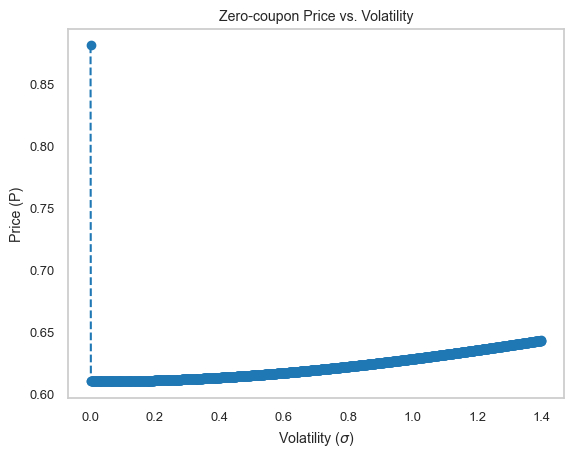

In [46]:
plt.plot(x_sigma, P, 'o--')

plt.ylabel('Price (P)')
plt.xlabel(r'Volatility ($\sigma$)')
plt.title('Zero-coupon Price vs. Volatility')
plt.show()

In [47]:
sigma = 0.3
x_k = np.linspace(0, 50, 5001)
T = 1
theta = 1
r0 = 0.2
r = r0 #When t = 0
gamma = (x_k**2+2*(sigma**2))**(1/2)
A = ( 2*gamma*np.exp((x_k+gamma)*(T-0)/2)  /( (gamma+x_k)*(np.exp(gamma*(T-0))-1)+2*gamma ) )**(2*x_k*theta/(sigma**2))
B = 2*(np.exp(gamma*(T-0))-1)/( (gamma+x_k)*(np.exp(gamma*(T-0))-1) +2*gamma )
P = A*np.exp(-B*r)
P

array([0.82114708, 0.81788621, 0.81465962, ..., 0.37382167, 0.37382047,
       0.37381927])

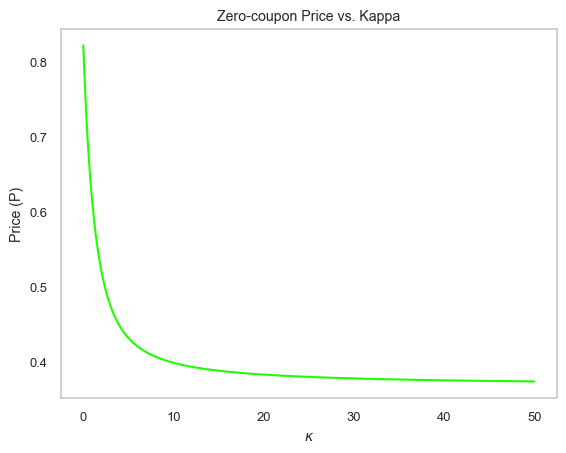

In [48]:
# Plot the results of coupon price vs. \kappa
plt.plot(x_k, P, color='#20ff00')
plt.ylabel('Price (P)')
plt.xlabel(r'$\kappa$')
plt.title('Zero-coupon Price vs. Kappa')
plt.show()

In [49]:
sigma = 0.3
k = 1
T = 1
x_theta = np.linspace(0, 50, 5001)
r0 = 0.2
r = r0 #When t = 0
gamma = (k**2+2*(sigma**2))**(1/2)
A = ( 2*gamma*np.exp((k+gamma)*(T-0)/2)  /( (gamma+k)*(np.exp(gamma*(T-0))-1)+2*gamma ) )**(2*k*x_theta/(sigma**2))
B = 2*(np.exp(gamma*(T-0))-1)/( (gamma+k)*(np.exp(gamma*(T-0))-1) +2*gamma )
P = A*np.exp(-B*r)
P

array([8.82251791e-01, 8.79027507e-01, 8.75815006e-01, ...,
       9.96221954e-09, 9.92581154e-09, 9.88953659e-09])

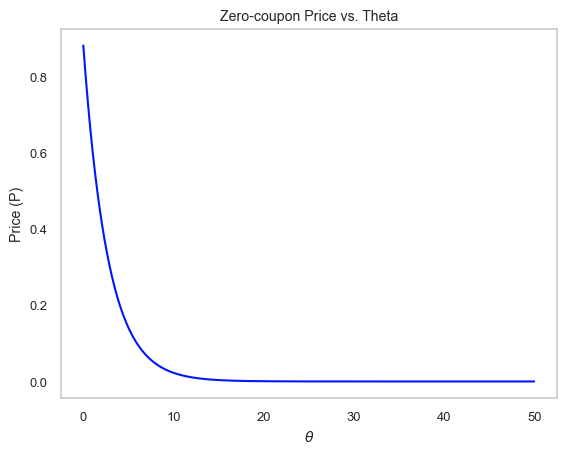

In [50]:
# Plot the results of coupon price vs. \theta
plt.plot(x_theta, P, color='#0016ff')
plt.ylabel('Price (P)')
plt.xlabel(r'$\theta$')
plt.title('Zero-coupon Price vs. Theta')
plt.show()

**2.2.1 Interpretation**
When interest rate volatility $\sigma$ increases, the integration of $r_t$ from $0$ to $T$ results in smaller and smaller values of interest. As a consequence, this reaction leads to an increase in the discounted value of the zero-coupon's price, $P$.

When $\kappa$ or $\theta$ increase, they will cause the drift of the interest rate to increase as well, meaning that the interest rate has a higher possibility of rising. In this way, when the interest rate goes up, the corresponding price of the zero-coupon goes down.

### Appendix: Monte Carlo Method

### 2.3 Monte Carlo

Assume that we are able to generate $M$ independent realisations of a random variable $X$. We denote by $X(j)$ the $j$-th realisation of the random variable with $j = 1, \ldots, M$. In Monte Carlo methods, we approach the expectation of $X$ by the empirical mean, that is
$$ \mathbb{E}[X] \approx \frac{1}{M} \sum_{j=1}^M X^{(j)} $$

---
---

## Part 3: Implied Volatility and the Black-Scholes Model <a name="part3"/>

### 3.1 Implied Volatility Definition

We recall that the Vega of a European call option is given by
$$ \text{Vega} = \frac{\partial \texttt{CallBS}( 0, T, S_{0}, K, r, \sigma )}{\partial \sigma} = S_{0} \frac{1}{\sqrt{2\pi}} e^{-\frac{\vert d_{+} ( r, S_{0}, K, T, \sigma ) \vert^{2}}{2}} \sqrt{T}$$
with
$$ d_+ ( r, S_0, K, T, \sigma ) =  \frac{ln( S_0 / K ) + ( r + \sigma^2 / 2 ) T}{\sigma \sqrt{T}}$$

We have seen in the end of the first part that the Vega is positive. We deduce that the price of a call option is indeed increasing (positive Vega) with respect to the volatility. Consequently, if we fix $r, S_0, T, K$ and we define
$$ \phi : \sigma \longmapsto \texttt{CallBS} ( 0, T, S_{0}, K, r, \sigma ) $$
the equation $\phi (\sigma) = C_K$ has a unique solution $\sigma^I$ for each observation of call price $C_K \geq 0$ with strike $K$. The map $\sigma^I : K \longmapsto \sigma^I (K)$ is called the implied volatility surface.

In this section, we are assuming that we observe prices of call options for different strikes when $r, T, S_0$ are fixed, and our goal is to find the corresponding volatility fitting with this observation. For this entire section, we denote by $\texttt{CallBS}( 0, T, S_{0}, K, r, \sigma )$ the price of a call option at time $t=0$ with maturity $T$, underlying price $S_0$, strike $K$, volatility $\sigma$, and interest $r$.

### 3.2 Newton-Raphson Model <a name="3.2"/>

The goal of Newton–Raphson method is to solve the following equation $g(x) = G$, where $G$ is a real observed and $g$ is a function of an unknown variable $x$. Staring from an initial guess $x_{0}$, the algorithm is defined by induction by building a sequence $(x_{n})_{n\geq1}$ such that $x_{n+1} = x_{n} - \frac{g(x_{n}) - G}{g^{\prime}(x_{n})}$.

Under the assumption that $g^{\prime}$ does not vanish and $g^{\prime\prime}$ is continuous, we can prove that starting with a guess $x_{0}$, the sequence $(x_{n})_{n\geq1}$ converges to $x^{*}$ such that $g(x^{*})=G$.

#### Question 3.2.1

Let $g(x) = x^{3}-2x$ and $G=5$, build the Newton Algorithm and find numerically one solution $x^{*}$ to the equation $g(x)=G$.


#### Solution 3.2.1

In [51]:
# Define the `g` functions
def g(x):
    return x**3 - x*2

def g_prime(x):
    return 3*x**2 - 2

In [52]:
# Build the NR algorithm to compute x_star
G = 5  # given
x0 = 1.0  # initial guess
tol = 1e-5  # some tolerance level

x_prev = x0
x_next = x0 - (g(x_prev) - G) / g_prime(x_prev)

while abs(x_next - x_prev) > tol:
    x_prev = x_next
    x_next = x_prev - (g(x_prev) - G) / g_prime(x_prev)

x_star = round(x_next, 5)

In [53]:
# Return the solution
print(f'One solution to the equation "g(x) = G" is approximately {x_star}')

One solution to the equation "g(x) = G" is approximately 2.09455


### 3.3 Data Collection <a name="3.3"/>

Choose an asset on Yahoofinance. The price today is $S_{0}$. Select options and look for option prices with maturity $T\approx 30/360$ (1 month). Take 10 call prices with their respective strike (the column `Last Price` is considered to be the call price). We choose the interest rate $r$ given by the one month (1-month) Treasury Rate; for example, $4\%$.

In [54]:
# Import ThetaData dependencies
from datetime import timedelta, datetime, date
from thetadata import ThetaClient, OptionReqType, OptionRight, DateRange, DataType, StockReqType
from thetadata.exceptions import NoData

Data collection and processing is not only a foundational skill we believe the financial industry requires of us, it adds intrinsic value to our work. In the remaining sections, we employ the speed and power of the [ThetaData API](https://thetadata-api.github.io/thetadata-python/tutorials/) to retrieve our financial data dynamically. Implementing these tools expands our experience in building valuation and trading algorithms, and provides access to a low latency source of massive amounts of unfiltered NBBO quotes. ThetaData achieves a real-time pricing latency of 3-5 milliseconds from their New Jersey servers by compressing data to 1/30th of its size at the time it is sent. Our project does not have a need for live quotes, and historical data is free.

For the data required in the exercises that follow, we have constructed four functions that create calls to ThetaData's servers and retrieve the data. The first step is to iterate a list of root symbols and retrieve all available contract expirations from the servers. To practice we will download the contract for each root that expires on the third Friday of each month for the 2023 calendar year. Next, we check that the monthly contract for 19 May is included in the data and then drop all the others.

Note that if you experience trouble connecting to the server client, there was a bug that I discovered which may not have been fully repaired on the server side. ThetaData is aware of the problem. A present workaround for this particular issue is to set the host ip, port, and stable version parameters in the `ThetaClient()` call with the settings provided in each function's codeblock (currently commented out to be available as needed). You can access the GitHub [here](https://github.com/ThetaData-API/thetadata-python).

In [57]:
def get_MultiExpirations(
        list_of_roots: list,
        startDate,
        endDate,
        freq,
) -> pd.DataFrame:
    """
    Retrieve expirations for a list of option roots.

    :param list_of_roots: Root symbols of the data to be collected.
    :param startDate:     Start date in the range of contract expirations.
    :param endDate:       End date in the range of contract expirations.
    :param freq:          Pandas offset aliases for the contracts.
    :return:              A pandas DataFrame of root symbols and the available
                              contracts within the given range from ThetaData.
    """
    expirations = pd.DataFrame()
    standard_contracts = pd.date_range(
        start=startDate,
        end=endDate,
        freq=freq)

    # Create a ThetaClient
    client = ThetaClient(  # no credentials required for free access
        # host='127.0.0.1',
        # port=11001,
        # stable=False
    )
    # Connect to the Terminal; make any requests for data inside this block
    # Requests made outside this block won't run
    with client.connect():
        try:
            for root in list_of_roots:
                # Make the request
                data = client.get_expirations(root=root)  # returns a pd.Series
                exp = pd.DataFrame(
                    [pd.to_datetime(date, format='%Y-%m-%d')\
                     for date in data if date in standard_contracts.values\
                     ]
                )
                expirations = pd.concat([expirations, exp], axis=1)
                expirations = expirations.rename(columns={0: f'{root}'})

        except NoData:
            print(f'No expiration matched the requested range for contract {root}')
    return expirations

In [58]:
# Define a list of root symbols
# my_roots = ['TSLA', 'SPX', 'ISRG', 'BIG', 'PGR', 'VTLE', 'T', 'CENX', 'WFC', 'ALB']
my_roots = ['SPX']

# Retrieve the expiry dates for each root w/in a desired range & frequency
expirations = get_MultiExpirations(
    my_roots,
    startDate=datetime(2023,1,1),
    endDate=datetime(2023,12,31),
    freq='WOM-3FRI',
)

If you require API support, feel free to join our discord server! http://discord.thetadata.us
------------------------------------------------------------------------------------------------
You are using the free version of Theta Data. You are currently limited to 20 requests / minute.
A data subscription can be purchased at https://thetadata.net. If you already have a ThetaData
subscription, specify the username and passwd parameters.
------------------------------------------------------------------------------------------------
Starting Theta Terminal [v0.9.6 REV: A]  --> Config: /Users/homeA/ThetaData/ThetaTerminal/config_0.properties
[MDDS] Attempting login as default
[MDDS] CONNECTED: [nj-a.thetadata.us:12001], Bundle: FREE, Permissions: End of Day(EOD)
[FPSS] Attempting login as default


In [59]:
# Display the result
expirations

,SPX
0,2023-01-20
1,2023-02-17
2,2023-03-17
3,2023-04-21
4,2023-05-19
5,2023-06-16
6,2023-07-21
7,2023-08-18
8,2023-09-15
9,2023-10-20


In [60]:
# Inspect the DataFrame for May 2023's contract
check_expiry = expirations[lambda x: x == datetime(2023, 5, 19)].reset_index(drop=True)
check_expiry

,SPX
0,NaT
1,NaT
2,NaT
3,NaT
4,2023-05-19
5,NaT
6,NaT
7,NaT
8,NaT
9,NaT


We need to find corresponding strike prices for each root and the given contract expiry. Given a list of root symbols and contract expiration date, the `get_Strikes()` function will deliver all the available strikes from the server. The user can then make a selection from the available choices. Our selections were made by locating ten out-of-the-money call option contracts actively trading on 21 April, 2023. Below we show how the strikes were retrieved using the ThetaData API.

In [61]:
# Function to get the call option strike prices
def get_Strikes(
        list_of_roots: list,
        expiry,
) -> pd.Series:
    """
    Retrieve strikes for a list of option roots.

    :param list_of_roots: Root symbols of the data to be collected.
    :param expiry:        Expiration date for the requested contract.
    :return:              A pandas Series of roots with strike prices
                              for the given contract.
    """
    strikes = {}

    client = ThetaClient(
        # host='127.0.0.1',
        # port=11001,
        # stable=False,
    )
    with client.connect():
        for root in list_of_roots:
            try:
                data = client.get_strikes(root=root, exp=expiry)
                strikes[root] = pd.to_numeric(data)

            except NoData:
                print(f'No data available for contract {root} {expiry}')
    return strikes

In [62]:
# Build a dictionary of root symbols w/ strikes for a given expiration date
strikes = get_Strikes(my_roots, expiry=date(2023, 5, 19))

If you require API support, feel free to join our discord server! http://discord.thetadata.us
------------------------------------------------------------------------------------------------
You are using the free version of Theta Data. You are currently limited to 20 requests / minute.
A data subscription can be purchased at https://thetadata.net. If you already have a ThetaData
subscription, specify the username and passwd parameters.
------------------------------------------------------------------------------------------------
Starting Theta Terminal [v0.9.6 REV: A]  --> Config: /Users/homeA/ThetaData/ThetaTerminal/config_0.properties
[MDDS] Attempting login as default
[MDDS] CONNECTED: [nj-a.thetadata.us:12001], Bundle: FREE, Permissions: End of Day(EOD)
[FPSS] Attempting login as default


In [63]:
# Get 10 strikes for SPX
ten_spx_strikes = strikes['SPX'][232:242]
ten_spx_strikes.name = 'SPX'

# Display the data
ten_spx_strikes

232    4200.0
233    4205.0
234    4210.0
235    4215.0
236    4220.0
237    4225.0
238    4230.0
239    4235.0
240    4240.0
241    4245.0
Name: SPX, dtype: float64

In [64]:
# Create a dictionary of the desired roots:strikes that
my_strikes_dict = {ten_spx_strikes.name: ten_spx_strikes.tolist()}

# Display the result
my_strikes_dict

{'SPX': [4200.0,
  4205.0,
  4210.0,
  4215.0,
  4220.0,
  4225.0,
  4230.0,
  4235.0,
  4240.0,
  4245.0]}

Now, retrieve the end-of-day call option quotes given a dictionary of root symbols and strike prices. The function `eod_Quotes()` requires a contract expiration date, and start to end dates for the desired range of end-of-day quotes.

In [65]:
# EOD call option data
def eod_OptionQuotes(
        dict_of_roots: dict,
        expiry,
        startDate,
        endDate,
) -> pd.DataFrame:
    """
    Retrieve the end-of-day option close prices.

    :param dict_of_roots: Root symbols of the data to be collected.
    :param expiry:        The contract expiration date.
    :param startDate:     Start date in the range of trading days.
    :param endDate:       End date in the range of trading days.
    :return:              A pandas DataFrame of contracts with EOD close prices.
    """
    client = ThetaClient(
        # host = '127.0.0.1',
        # port = 11001,
        # stable = False
    )
    results = pd.DataFrame()

    with client.connect():
        for root, strikes in dict_of_roots.items():
            for strike in strikes:
                try:
                    # Make the request
                    data = client.get_hist_option(
                        req=OptionReqType.EOD,  # end-of-day data
                        root=root,
                        exp=expiry,
                        strike=strike,
                        right=OptionRight.CALL,
                        date_range=DateRange(startDate, endDate)
                    )
                    data.index = [f'{root}']
                    results = pd.concat([results, data])
                except NoData:
                    print(f'No option data available for contract {root} {expiry} {strike}')

    return results

In [66]:
# Retrieve the end-of-day quotes for the specified date range
option_quotes = eod_OptionQuotes(
    my_strikes_dict,
    expiry=date(2023, 5, 19),
    startDate=date(2023, 4, 21),
    endDate=date(2023, 4, 21),
)

# Only keep the EOD 'CLOSE' prices
spx_option_quotes = option_quotes.iloc[:, 3]

If you require API support, feel free to join our discord server! http://discord.thetadata.us
------------------------------------------------------------------------------------------------
You are using the free version of Theta Data. You are currently limited to 20 requests / minute.
A data subscription can be purchased at https://thetadata.net. If you already have a ThetaData
subscription, specify the username and passwd parameters.
------------------------------------------------------------------------------------------------
Starting Theta Terminal [v0.9.6 REV: A]  --> Config: /Users/homeA/ThetaData/ThetaTerminal/config_0.properties
[MDDS] Attempting login as default
[MDDS] CONNECTED: [nj-a.thetadata.us:12001], Bundle: FREE, Permissions: End of Day(EOD)
[FPSS] Attempting login as default
[FPSS]Disconnected from server: INVALID_CREDENTIALS


In [67]:
# Visually inspect the data
spx_option_quotes

SPX    34.60
SPX    31.44
SPX    30.20
SPX    26.50
SPX    26.37
SPX    24.10
SPX    21.80
SPX    20.00
SPX    19.30
SPX    17.40
Name: DataType.CLOSE, dtype: float64

Note that the underlying price data for indices, such as S&P 500, are currently unavailable from ThetaData. Our solution is to retrieve the data using the `yfinance` package library.

In [68]:
# Retrieve S&P 500 index data from Yahoo Finance
spx_data = yf.download('^GSPC', start='2023-04-24', end='2023-04-25', group_by='Ticker')

# Build a dataframe of daily close prices
spx_data = pd.DataFrame(spx_data['Close'])
spx_data.index = pd.to_datetime(spx_data.index)
spx = spx_data.rename(columns={'Close': 'SPX'})
spx_shares_price = spx.reset_index(drop=True).T

# Display the result
spx_shares_price

[*********************100%***********************]  1 of 1 completed


,0
SPX,4137.040039


### 3.4 Volatility Surface <a name="3.4"/>

We want to use the Newton-Raphson method to find the implied volatility given your datas. We want to draw the graph of the function $\sigma^{I}(K)$ as a function of strikes $K$ such that
    $$ \texttt{CallBS}(0,T,S_{0},K,r,\sigma^{I}(K)) = C_{K} $$
where
* $r$ is the interest rate calibrated as the risk-free rate by finding the Treasury bill rate with maturity 4 weeks previously;
* $S_{0}$ is the price today of the underlying asset found in Yahoofinance;
* $T\approx 30/360$
* $C_{K}$ is the price of the call option observed on Yahoofinance with strike $K$.

Thus, we choose the Newton algorithm $g(x) = \texttt{CallBS}(0,T,S_{0},K,r,x),\ G = C_{K}$ and
    $$ g\prime (x) = S_{0} \frac{1}{\sqrt{2\pi}} e^{-\frac{\vert d_{+} (r,S_{0},K,T,x) \vert^{2}}{2}} \sqrt{T} $$
where $x$ is the implied volatility to be determined with associated strike $K$ by the Newton algorithm.

#### Question 3.4.1
Implement the Newton algorithm to find the implied volatility. Give a table with the implied volatility and the corresponding strikes found with the Newton method.

*Hint: Remember the approximation formula $C_{K} \approx 0.4S_{0}\sigma\sqrt{T}$, hence you can choose $\sigma_{0} := \frac{C_{K}}{0.4 S_{0} \sqrt{T}}$
to initialize your algorithm.*

#### Solution 3.4.1

The 4-week risk-free rate as of 21 April, 2023, is $3.35 \%$. Hence, in the following calculations we set $r=0.0335$.

In [69]:
# Define a function to compute vega, the sensitivity to volatility
def vega(T, S0, K, r, sigma):
    "Calculate BS price of call"
    d1 = (np.log(S0/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    # Partial of Black-Scholes wrt sigma
    bs_prime = S0*norm.pdf(d1, 0, 1)*np.sqrt(T)

    return bs_prime

In [70]:
# Define a function for computing single parameter implied volatility
def impliedVol(T, S0, K, r, Ck):
    sigma0 = Ck / (0.4 * S0 * np.sqrt(T))  # initial guess
    tol = 1e-5  # some tolerance level

    # Initialise parameters
    bs = blackScholes(T=T, S0=S0, K=K, r=r, sigma=sigma0)
    c_prime = vega(T=T, S0=S0, K=K, r=r, sigma=sigma0)
    sigma_prev = sigma0
    sigma_next = sigma_prev - (bs - Ck) / c_prime
    # bs_next = blackScholes(T=T, S0=S0, K=K, r=r, sigma=sigma_next)

    # Implement the Newton algorithm
    while abs(sigma_next - sigma_prev) > tol:
        sigma_prev = sigma_next
        bs_next = blackScholes(T=T, S0=S0, K=K, r=r, sigma=sigma_prev)
        c_prime = vega(T=T, S0=S0, K=K, r=r, sigma=sigma_prev)
        sigma_next = sigma_prev - (bs_next - Ck) / c_prime
    sigma_star = round(sigma_next, 5)

    return sigma_star

The example below shows the Black-Scholes option price for an SPX call taking $\sigma = \sigma_0$ derived from the BS call option approximation formula.

In [71]:
# Give the call prices for the given parameters
T = 28/360
S0 = spx_shares_price.loc['SPX'][0]
K = my_strikes_dict['SPX'][0]
Ck = spx_option_quotes[0]
r = 0.03335
sigma0 = Ck / (0.4*S0*np.sqrt(T))

spx_bs_price = blackScholes(T, S0=S0, K=K, r=r, sigma=sigma0)

# Display the results
print(f'The Black-Scholes option price is: ${round(spx_bs_price, 5)}')

The Black-Scholes option price is: $14.72146


In [72]:
# Example computation with impliedVol() function for Tesla
imp_vol = impliedVol(T=T, S0=S0, K=K, r=r, Ck=Ck)

# Display the results
print(f'The implied volatility is: {round(imp_vol, 3)}')

The implied volatility is: 0.123


We define an `options_params()` function that can generate a dictionary of underlying assets' root symbols as keys, along with their respective prices, option contract prices, and option contract strike prices as key-values. This new dictionary of parameters can then be passed to the `get_impliedVol()` function to compute implied volatilities for each asset simutaneously. The formatting is as follows:
$$ \text{parameters dictionary } = \{ \text{'root':}\ [ S_0,\ \{ K:\ C_K \}] \} $$

In [73]:
# Pricing parameters
def option_params(
        stockCurrentPrice,
        optionCurrentPrice,
        theStrikes: dict,
) -> dict:
    """
    Collect the option pricing function's argument parameters.

    :param stockCurrent:  Pandas DataFrame of stock roots and current price (S0) pairs.
    :param optionCurrent: Pandas Series of stock roots and option close price (Ck) pairs.
    :param strikes:       Dictionary of stock roots and strike (K) pairs.
    :return:              A dictionary of stock roots as keys and [S0, {K: Ck}] as values.
    """
    the_dict = {}
    for root, strikes in theStrikes.items():
        the_dict_vals = {}
        for i, val in enumerate(strikes):
            the_dict_vals[val] = optionCurrentPrice.iloc[i]
        the_dict[root] = [stockCurrentPrice.loc[root][0], the_dict_vals]
    return the_dict

In [74]:
# Generate a dictionary of assets parameters
params = option_params(spx_shares_price, spx_option_quotes, my_strikes_dict)

# Display one of the key-value pairs to illustrate
print(
    r'Your dictionary contains the following key-value',
    r'pairs (format = {"root": [S0, {K: Ck}]}):',
)
for root, vals in params.items():
    print(f'{root}:\nIndex Price = {vals[0]}')
    print(
        'Strike Price: Call Price = {\n' + ',\n'\
        .join([f'{k}: {v}' for k, v in vals[1].items()])\
        + '\n}',
    )

Your dictionary contains the following key-value pairs (format = {"root": [S0, {K: Ck}]}):
SPX:
Index Price = 4137.0400390625
Strike Price: Call Price = {
4200.0: 34.6,
4205.0: 31.44,
4210.0: 30.200000000000003,
4215.0: 26.5,
4220.0: 26.37,
4225.0: 24.1,
4230.0: 21.8,
4235.0: 20.0,
4240.0: 19.3,
4245.0: 17.400000000000002
}


In [75]:
# Define a function for computing implied volatility given multiple
# parameter inputs
def get_impliedVol(
        T: float = 1.0,
        parameters: dict = {},
        r: int = 0.02,
) -> pd.DataFrame:
    """
    Compute the implied volatility for a European call option using the
    Black-Scholes Model and the Newton-Raphson method.

    :param T:          The time to expiration of the contract.
    :param parameters: A dictionary of underlying roots, the underlying's price,
                           and a nested dictionary of call option strike prices
                           mapped to the option market prices as key-value pairs.
    :param r:          The risk-free rate.
    :return:           A pandas DataFrame of roots, strikes, and the implied volatility.
    """
    tol = 1e-5  # some tolerance level

    results = []
    for symb, values in parameters.items():
        S0 = values[0]
        for strike, optPrice in values[1].items():
            # Initialise parameters
            K = strike
            Ck = optPrice
            sigma0 = Ck / (0.4*S0*np.sqrt(T))  # initial guess
            bs = blackScholes(T=T, S0=S0, K=K, r=r, sigma=sigma0)
            c_prime = vega(T=T, S0=S0, K=K, r=r, sigma=sigma0)
            sigma_prev = sigma0
            sigma_next = sigma_prev - (bs - Ck) / c_prime

            # Implement the Newton algorithm
            while abs(sigma_next - sigma_prev) > tol:
                sigma_prev = sigma_next
                bs_next = blackScholes(T=T, S0=S0, K=K, r=r, sigma=sigma_prev)
                c_prime = vega(T=T, S0=S0, K=K, r=r, sigma=sigma_prev)
                sigma_next = sigma_prev - (bs_next - Ck) / c_prime

            sigma_star = round(sigma_next, 5)

            # Display the results
            print(f'The implied volatility for {symb} at strike {strike} is: {round(sigma_star, 3)}')

            # store results in a DataFrame
            results.append([symb, strike, sigma_star])
    implied_vol = pd.DataFrame(results, columns=['Symb', 'Strike', 'Imp. Volatility'])
    return implied_vol

In [76]:
# Display the volatility prints
# T is number of days between 21APR23-19MAY23 of 360 days
volatility_results = get_impliedVol(T=28/360, parameters=params)

The implied volatility for SPX at strike 4200.0 is: 0.126
The implied volatility for SPX at strike 4205.0 is: 0.123
The implied volatility for SPX at strike 4210.0 is: 0.124
The implied volatility for SPX at strike 4215.0 is: 0.118
The implied volatility for SPX at strike 4220.0 is: 0.122
The implied volatility for SPX at strike 4225.0 is: 0.12
The implied volatility for SPX at strike 4230.0 is: 0.117
The implied volatility for SPX at strike 4235.0 is: 0.116
The implied volatility for SPX at strike 4240.0 is: 0.117
The implied volatility for SPX at strike 4245.0 is: 0.115


In [77]:
# Display the output as a DataFrame
volatility_results['Strike'] = [strike for strike in range(4200, 4250, 5)]
volatility_results

,Symb,Strike,Imp. Volatility
0,SPX,4200,0.12633
1,SPX,4205,0.12285
2,SPX,4210,0.12372
3,SPX,4215,0.11844
4,SPX,4220,0.12174
5,SPX,4225,0.11956
6,SPX,4230,0.11705
7,SPX,4235,0.11559
8,SPX,4240,0.11694
9,SPX,4245,0.11480


#### Question 3.4.2
Draw the implied volatility graph with respect to the strike.

#### Solution 3.4.2

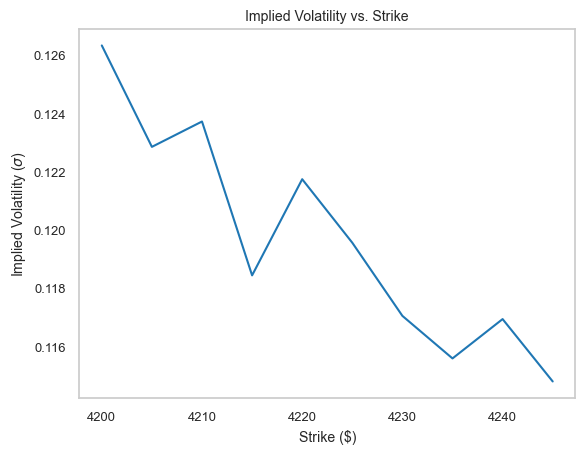

In [78]:
# Plot the volatility graph
plt.plot(volatility_results['Strike'], volatility_results['Imp. Volatility'])
plt.xlabel('Strike ($)')
plt.ylabel(r'Implied Volatility ($\sigma$)')
plt.title('Implied Volatility vs. Strike')
plt.show()

Recall that the close price for the SPX Index is $4137 and that all of our selected strike prices are hence out of the money. The current figure leads us to believe that had we plotted both OTM strikes *and* ITM strikes, we might interpret the tail of this volatility curve as "frowning". (See reference below.)

![Implied Volatility](https://www.uia.no/var/uia/storage/images/studenter-i-forskningsprosjekt/investor-s-risk-preferences-and-implied-volatility-smiles2/2565285-1-nor-NO/investor-s-risk-preferences-and-implied-volatility-smiles_fullwidth.png)